# EITC + CTC + CDCC per child

## Setup

### Imports

In [16]:
import taxcalc as tc
import microdf as mdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [2]:
YEAR = 2019

### Utilities

In [3]:
def rt(rate, year=YEAR):
    return {year: rate}

RT_ZERO = rt(0)
RT_ONE = rt(1)
RT_4ZEROS = rt([0, 0, 0, 0])  # For EITC, split by number of children.
RT_5ZEROS = rt([0, 0, 0, 0, 0])  # For others, split by MARS.

In [4]:
REPEAL_CREDITS_REFORM = {
    'EITC_c': RT_4ZEROS,
    'CTC_c': RT_ZERO,
    'ACTC_c': RT_ZERO,
#     'ODC_c': RT_ZERO,
    'CDCC_c': RT_ZERO
}

## Data

In [5]:
base = mdf.calc_df(year=YEAR, metric_vars=['nu18', 'n24'])[[
    'n24', 'nu18', 'n24_m', 'nu18_m', 'aftertax_income', 's006']]

In [6]:
reform = mdf.calc_df(year=YEAR, 
                     reform=REPEAL_CREDITS_REFORM)[['aftertax_income']]

CTC_c was redefined in release 1.0.0



In [7]:
base['aftertax_income_reform'] = reform.aftertax_income

In [8]:
base['tax_diff'] = base.aftertax_income - base.aftertax_income_reform
base['tax_diff_per_nu18'] = base.tax_diff / base.nu18
base['tax_diff_per_n24'] = base.tax_diff / base.n24

In [9]:
base[base.tax_diff_per_nu18 < np.inf].tax_diff_per_nu18.max()

7895.423292908465

In [10]:
base[base.tax_diff_per_n24 < np.inf].tax_diff_per_n24.max()

7975.050000000003

In [11]:
base[base.tax_diff_per_nu18 < np.inf].sort_values(
    'tax_diff_per_nu18', ascending=False).head(10)

,n24,nu18,n24_m,nu18_m,aftertax_income,s006,aftertax_income_reform,tax_diff,tax_diff_per_nu18,tax_diff_per_n24
RECID,,,,,,,,,,
208027,1.0,1.0,0.001436,0.001436,21241.807524,1436.27,13346.384231,7895.423293,7895.423293,7895.423293
329848,1.0,1.0,0.000696,0.000696,50369.827832,695.86,42963.608976,7406.218856,7406.218856,7406.218856
125514,1.0,1.0,0.002314,0.002314,55390.739425,2313.83,47988.347786,7402.391640,7402.391640,7402.391640
5709,1.0,1.0,0.000067,0.000067,25055.028463,67.14,17659.871415,7395.157048,7395.157048,7395.157048
250572,1.0,1.0,0.000652,0.000652,51297.206940,651.81,43912.145732,7385.061208,7385.061208,7385.061208
140970,1.0,1.0,0.000668,0.000668,87227.479811,668.13,79847.685336,7379.794474,7379.794474,7379.794474
202459,1.0,1.0,0.001527,0.001527,64488.648965,1526.96,57140.791220,7347.857745,7347.857745,7347.857745
310519,1.0,1.0,0.000215,0.000215,23956.016261,215.04,16629.221582,7326.794679,7326.794679,7326.794679
121221,1.0,1.0,0.000516,0.000516,30284.497429,515.86,22971.000942,7313.496487,7313.496487,7313.496487


In [12]:
def pct_kids_better_off(allowance):
    return (base[base.tax_diff_per_nu18 < allowance].nu18_m.sum() /
            base.nu18_m.sum())

In [13]:
X = np.arange(0, 8000, 100)
pct_kids_better_off_df = pd.Series([pct_kids_better_off(i) for i in X],
                                   index=X)

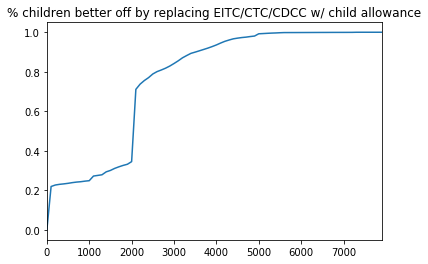

In [20]:
pct_kids_better_off_df.plot()
plt.title('% children better off by replacing EITC/CTC/CDCC ' +
          'w/ child allowance')
plt.show()

In [21]:
pct_kids_better_off_df.loc[[4500, 6500]]

4500    0.970198
6500    0.998985
dtype: float64